In [ ]:
Notebook to get and clean the data of El Español newspaper about covid19 vaccination

In [1]:
from helpers import *

In [45]:
def get_links_el_español(url): 
    list_links_el_español=[]
    driver.get(url)
    while True: 
        links = driver.find_elements_by_xpath('//h3/a')
        for i in links: 
            list_links_el_español.append(i.get_attribute('href'))
        try :
            next = driver.find_element_by_xpath('//a[@title="Siguiente"]')
            next.click()
            time.sleep(0.5)
        except :
            print("No more pages left")
            break
    return list_links_el_español

In [46]:
#USING SELENIUM TO EXTRACT THE CONTENT --> SLOW
# def get_articles_el_español(list_links_el_español): 
#     articles_list_el_español=[] 
#     extracted_articles=0
#     for i in list_links_el_español: 
#         list_text=[]
#     #     time.sleep(1)
#         driver.get(i)
#         try:
#             title=driver.find_element_by_xpath('//h1[contains(@class,"article-header")]').text
#         except: 
#             title='error'
#         try: 
#             author=driver.find_element_by_xpath('//span[@class="address__author"]/a').text
#         except:
#             author = 'error'
#         try: 
#             date =driver.find_element_by_xpath('//span[contains(@class,"article-header__time-date")]').text
#         except: 
#             date ='error'
#         texts = driver.find_elements_by_xpath('//div[@id="article-body-content"]/p')
#         for element in texts:
#             list_text.append(element.text)
#         text=" ".join(list_text); 
#         try: 
#             subheadline = driver.find_element_by_xpath('//h2[@class="article-header__subheading"]').text
#         except: 
#             subheadline = 'error'
#         extracted_articles += 1
#          print(f'Extracted articles: {extracted_articles} of {len(list_links_el_español)}',end='\r')
#         articles_list_el_español.append({'Title': title, 
#                               'Subheadline':subheadline,
#                               'Text':text,
#                               'Authors': author, 
#                               'Date': date,
#                               'Link':i}) 

In [2]:
# Clean function in order to eliminate characters like \n or \n\n after scraping
def preprocessor(text):
#     text = str(text).lower()
    
#     text = re.sub('https?://\S+|www\.\S+', '', text)
#     text = re.sub('<.*?>+', '', text)
#     text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n\n', '', text)
    text = re.sub('\'','', text)
    text = re.sub('\n', '', text)
    text = re.sub('\xa0', '', text)
    text = re.sub('\xad', '', text)
    text = re.sub('\ufeff', '', text)
    text = re.sub('\u2009', '', text)
    text = re.sub('\u200b', '', text)    
#     text = re.sub('\w*\d\w*', '', text)
    return text
    

In [48]:
#Install Driver
# Versión Chrome 89.0.4389.114 (Build oficial) (64 bits)
driver = webdriver.Chrome(ChromeDriverManager().install())




====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST driver version for 96.0.4664
Driver [/home/david/.wdm/drivers/chromedriver/linux64/96.0.4664.45/chromedriver] found in cache


# EL ESPAÑOL

In [49]:
search_url='https://www.elespanol.com/temas/vacuna_covid_19/'

driver.get(search_url)
driver.maximize_window() 
time.sleep(1)
driver.find_element_by_id('didomi-notice-agree-button').click()

In [50]:
list_links_el_español = get_links_el_español(search_url)

No more pages left


In [54]:
# #Store the list in a document
# with open("list_links_el_español.txt", 'w') as f:
#     for s in list_links_el_español:
#         f.write(str(s) + '\n')


In [55]:
with open("list_links_el_español.txt", 'r') as f:
    list_links_el_español = [line.rstrip('\n') for line in f]
    list_links_el_español= list(set(list_links_el_español))
len(list_links_el_español)

1782

In [56]:
def get_html_el_español(list_links):
    #Count
    extracted_articles=0 
    for i in list_links: 
        driver.get(i)
        html = driver.page_source
        tail=i.split('/')[-1]
        extracted_articles += 1
        with open(f'/home/david/Escritorio/VACTINATION_PROJECT/HTMLs/EL_ESPAÑOL/{tail}.txt', 'w') as f: 
            f.write(html)
        print(f'Extracted articles: {extracted_articles} of {len(list_links)}',end='\r')
        time.sleep(1)

In [60]:
# get_html_el_español(list_links_el_español)

In [3]:
import os
list_articles_vacunacion_el_español=[]
for filename in os.listdir("/home/david/Escritorio/VACCINATION_PROJECT/HTMLs/EL_ESPAÑOL/"):
    with open(os.path.join("/home/david/Escritorio/VACCINATION_PROJECT/HTMLs/EL_ESPAÑOL/", filename), 'r') as f:
        html_file = f.read()
    list_text=[]
    soup = BeautifulSoup(html_file, 'html.parser')
    try:
        title=soup.find("h1", class_="article-header__heading article-header__heading--s3").text.strip()
    except: 
        title="error"
    try:
        author=soup.find(class_='address__author').text.strip()
    except: 
        author = "error"
    try:
        link=soup.find('link', rel='canonical')['href']
    except: 
        link="error"
    try:
        subheadline= soup.find(class_="article-header__subheading").text.strip()
    except: 
        subheadline="error"
    try:
        date= soup.find("span",class_="article-header__time article-header__time--zonan").find("span",class_="article-header__time-date article-header__time--zonan-date").text
    except: 
        date="error"
    try:
        soup.find("p", {"id": "articlebody"})
        #We take all the id that contain paragraph
        tf= soup.find_all("p",{"id":re.compile('paragraph')})

        for p in tf:
            list_text.append(p.get_text().strip())
        text=' '.join(list_text).strip()
    except: 
        text=soup.find(class_="NormalTextoNoticia").text(strip())
        text= "error"
    list_articles_vacunacion_el_español.append({'Title': title, 
                          'Subheadline':subheadline,
                          'Text':text,
                          'Authors': author, 
                          'Date': date,
                          'Link':link}) 



In [4]:
articles_el_español = pd.DataFrame.from_dict(list_articles_vacunacion_el_español)
articles_el_español

,Title,Subheadline,Text,Authors,Date,Link
0,Sanidad notifica 2.037 nuevos contagios de Cov...,Las CCAA autónomas han administrado hasta este...,El Ministerio de Sanidad ha registrado este vi...,E.E.,"1 octubre, 2021",https://www.elespanol.com/espana/20211001/sani...
1,España reanuda la semana que viene la vacunaci...,La decisión se produce después de que la Agenc...,"La ministra de Sanidad, Carolina Darias, ha an...",Í.Z.,"18 marzo, 2021",https://www.elespanol.com/espana/20210318/espa...
2,Las nuevas restricciones en la Comunidad de Ma...,La hostelería y la cultura pueden abrir hasta ...,La ampliación de horarios hasta la 01.00 horas...,E.E.,"31 mayo, 2021",https://www.elespanol.com/espana/madrid/202105...
3,Sanidad suma 27.688 casos y 41 muertes: la inc...,"Actualmente, hay 4.705 pacientes ingresados po...",Las comunidades autónomas han notificado este ...,E. E.,"15 julio, 2021",https://www.elespanol.com/espana/20210715/sani...
4,Castilla-La Mancha descarta nuevas restriccion...,Es la primera vez que la región acumula cinco ...,El Gobierno de Castilla-La Mancha ha informado...,Julián Cazallas,"5 julio, 2021",https://www.elespanol.com/eldigitalcastillalam...
...,...,...,...,...,...,...
1469,Joe Biden suplica a los escépticos que se vacu...,Biden no consiguió alcanzar su meta de tener a...,"El presidente de Estados Unidos, Joe Biden, ha...",E. E.,"7 julio, 2021",https://www.elespanol.com/mundo/america/202107...
1470,El director del Centro de Vacunas de Oxford av...,"Andrew Pollard no descarta ""una nueva variante...",La variante Delta desbaratará cualquier estrat...,Ciencia | Agencias,"11 agosto, 2021",https://www.elespanol.com/ciencia/20210811/dir...
1471,Reino Unido levanta la cuarentena para los vac...,Alivio para el turismo. Los británicos con la ...,,E. E.,"8 julio, 2021",https://www.elespanol.com/mundo/europa/2021070...
1472,Madrid podría retrasar la segunda dosis de Pfi...,Pfizer recomienda que el espacio entre las dos...,La Comunidad de Madrid advierte que podría ret...,J.R.,"19 julio, 2021",https://www.elespanol.com/espana/madrid/202107...


In [5]:
articles_el_español['Text'] = articles_el_español['Text'].apply(preprocessor)

In [6]:
articles_el_español['n_words'] = articles_el_español.Text.apply(lambda x: len(str(x).split(' ')))

In [7]:
articles_el_español['Newspaper']='El Español'
articles_el_español['Country']='Spain'

In [8]:
#ELIMINATING SOME ARTICLES THAT WE DONT NEED

In [9]:
#viñetas
articles_el_español=articles_el_español.drop(articles_el_español[articles_el_español['Link'].str.contains("vineta")].index)
#Less than 100 words
articles_el_español=articles_el_español.drop(articles_el_español[articles_el_español['n_words']<100].index)
#Ultima hora --> son muy largos y no coge bien el titulo ni subheadline... No merece la pena
articles_el_español=articles_el_español.drop(articles_el_español[articles_el_español['Link'].str.contains("ultima-hora|ultimas-noticias")].index)

In [10]:
articles_el_español=articles_el_español.drop(articles_el_español[articles_el_español['Date']=="error"].index, inplace=False)

In [11]:
articles_el_español[articles_el_español.Text.str.contains("vacun|Vacu")|articles_el_español.Title.str.contains("vacun|Vacu")|articles_el_español.Subheadline.str.contains("vacun|Vacu")]

,Title,Subheadline,Text,Authors,Date,Link,n_words,Newspaper,Country
0,Sanidad notifica 2.037 nuevos contagios de Cov...,Las CCAA autónomas han administrado hasta este...,El Ministerio de Sanidad ha registrado este vi...,E.E.,"1 octubre, 2021",https://www.elespanol.com/espana/20211001/sani...,383,El Español,Spain
1,España reanuda la semana que viene la vacunaci...,La decisión se produce después de que la Agenc...,"La ministra de Sanidad, Carolina Darias, ha an...",Í.Z.,"18 marzo, 2021",https://www.elespanol.com/espana/20210318/espa...,696,El Español,Spain
3,Sanidad suma 27.688 casos y 41 muertes: la inc...,"Actualmente, hay 4.705 pacientes ingresados po...",Las comunidades autónomas han notificado este ...,E. E.,"15 julio, 2021",https://www.elespanol.com/espana/20210715/sani...,445,El Español,Spain
4,Castilla-La Mancha descarta nuevas restriccion...,Es la primera vez que la región acumula cinco ...,El Gobierno de Castilla-La Mancha ha informado...,Julián Cazallas,"5 julio, 2021",https://www.elespanol.com/eldigitalcastillalam...,365,El Español,Spain
5,Bruselas da un paso más para prohibir las expo...,El endurecimiento de controles responde al inc...,La guerra de vacunas entre la Unión Europea y ...,Juan Sanhermelando,"24 marzo, 2021",https://www.elespanol.com/mundo/europa/2021032...,731,El Español,Spain
...,...,...,...,...,...,...,...,...,...
1468,"Ciencia, inversión y colaboración público-priv...",La V edición de Conversaciones para el Lideraz...,Se habla de la innovación y la tecnología como...,Gabriel Morales,"12 julio, 2021",https://www.elespanol.com/ciencia/20210712/cie...,1312,El Español,Spain
1469,Joe Biden suplica a los escépticos que se vacu...,Biden no consiguió alcanzar su meta de tener a...,"El presidente de Estados Unidos, Joe Biden, ha...",E. E.,"7 julio, 2021",https://www.elespanol.com/mundo/america/202107...,540,El Español,Spain
1470,El director del Centro de Vacunas de Oxford av...,"Andrew Pollard no descarta ""una nueva variante...",La variante Delta desbaratará cualquier estrat...,Ciencia | Agencias,"11 agosto, 2021",https://www.elespanol.com/ciencia/20210811/dir...,342,El Español,Spain
1472,Madrid podría retrasar la segunda dosis de Pfi...,Pfizer recomienda que el espacio entre las dos...,La Comunidad de Madrid advierte que podría ret...,J.R.,"19 julio, 2021",https://www.elespanol.com/espana/madrid/202107...,482,El Español,Spain


In [12]:
#all articles that contains vacu
articles_el_español=articles_el_español[articles_el_español.Text.str.contains("vacun|Vacu")|articles_el_español.Title.str.contains("vacun|Vacu")|articles_el_español.Subheadline.str.contains("vacun|Vacu")]

In [13]:
#Date
for index,row in articles_el_español.iterrows(): 
    try:
        articles_el_español['Date'][index] =dateparser.parse(row.Date).date()
    except: 
        continue

/home/david/anaconda3/lib/python3.9/site-packages/dateparser/date_parser.py:35: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  date_obj = stz.localize(date_obj)
/tmp/ipykernel_98778/2684311149.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles_el_español['Date'][index] =dateparser.parse(row.Date).date()


In [14]:
articles_el_español.sort_values('Date')

,Title,Subheadline,Text,Authors,Date,Link,n_words,Newspaper,Country
347,La EMA concluye que la vacuna de AstraZeneca e...,El Ministerio de Sanidad y las comunidades aut...,La Agencia Europea del Medicamento (EMA) ha fi...,Mercedes Rivera,2021-03-18,https://www.elespanol.com/ciencia/20210318/ema...,357,El Español,Spain
1,España reanuda la semana que viene la vacunaci...,La decisión se produce después de que la Agenc...,"La ministra de Sanidad, Carolina Darias, ha an...",Í.Z.,2021-03-18,https://www.elespanol.com/espana/20210318/espa...,696,El Español,Spain
1247,Un policía de Jerez ingresa con espasmos cardí...,"Antes de su ingreso hospitalario, el agente pa...",Un agente de la Policía Nacionaldestinado en J...,A. L.,2021-03-18,https://www.elespanol.com/reportajes/20210318/...,279,El Español,Spain
851,"Dos policías y un guardia civil, con trombos t...",La Generalitat Valenciana subraya que ninguno ...,Un agente de la Policía Nacional de 38 años ha...,Dani Valero,2021-03-18,https://www.elespanol.com/reportajes/20210318/...,445,El Español,Spain
162,Sanidad notifica 6.216 nuevos casos de Covid-1...,"Actualmente, hay 7.841 pacientes ingresados po...",Las comunidades autónomas han notificado este ...,E. E.,2021-03-18,https://www.elespanol.com/espana/20210318/sani...,748,El Español,Spain
...,...,...,...,...,...,...,...,...,...
396,Arranca el puente del Pilar con media España s...,"La incidencia acumulada este jueves era de 48,...",España encara este fin de semana con medio paí...,E.E.,2021-10-08,https://www.elespanol.com/espana/20211008/medi...,1721,El Español,Spain
1339,Lugares y horarios para vacunarse este fin de ...,No será necesario contar con cita previa para ...,La campaña devacunacióncontra el coronavirus l...,Julián Cazallas,2021-10-08,https://www.elespanol.com/eldigitalcastillalam...,250,El Español,Spain
778,Así hinchó el Gobierno valenciano sus datos de...,Sanidad calculaba sus porcentajes con una pobl...,El Gobierno valenciano calculó de manera errón...,Sergio Sampedro,2021-10-10,https://www.elespanol.com/alicante/vivir/salud...,641,El Español,Spain
1000,Las CCAA preparan una supercampaña de vacunaci...,Once millones de personas recibirán la tercera...,"Antes de que existiera la Covid-19, los servic...",I. P. Nova,2021-10-11,https://www.elespanol.com/espana/politica/2021...,1282,El Español,Spain


In [16]:
articles_el_español.to_csv(r'/home/david/Escritorio/VACCINATION_PROJECT/DF_HTML_VERSION/articles_el_español_premium.csv', index = False)

In [17]:
df=pd.read_csv('/home/david/Escritorio/VACCINATION_PROJECT/DF_HTML_VERSION/articles_el_español_premium.csv')

In [18]:
df.sort_values('Date')

,Title,Subheadline,Text,Authors,Date,Link,n_words,Newspaper,Country
312,La EMA concluye que la vacuna de AstraZeneca e...,El Ministerio de Sanidad y las comunidades aut...,La Agencia Europea del Medicamento (EMA) ha fi...,Mercedes Rivera,2021-03-18,https://www.elespanol.com/ciencia/20210318/ema...,357,El Español,Spain
1,España reanuda la semana que viene la vacunaci...,La decisión se produce después de que la Agenc...,"La ministra de Sanidad, Carolina Darias, ha an...",Í.Z.,2021-03-18,https://www.elespanol.com/espana/20210318/espa...,696,El Español,Spain
1116,Un policía de Jerez ingresa con espasmos cardí...,"Antes de su ingreso hospitalario, el agente pa...",Un agente de la Policía Nacionaldestinado en J...,A. L.,2021-03-18,https://www.elespanol.com/reportajes/20210318/...,279,El Español,Spain
769,"Dos policías y un guardia civil, con trombos t...",La Generalitat Valenciana subraya que ninguno ...,Un agente de la Policía Nacional de 38 años ha...,Dani Valero,2021-03-18,https://www.elespanol.com/reportajes/20210318/...,445,El Español,Spain
150,Sanidad notifica 6.216 nuevos casos de Covid-1...,"Actualmente, hay 7.841 pacientes ingresados po...",Las comunidades autónomas han notificado este ...,E. E.,2021-03-18,https://www.elespanol.com/espana/20210318/sani...,748,El Español,Spain
...,...,...,...,...,...,...,...,...,...
356,Arranca el puente del Pilar con media España s...,"La incidencia acumulada este jueves era de 48,...",España encara este fin de semana con medio paí...,E.E.,2021-10-08,https://www.elespanol.com/espana/20211008/medi...,1721,El Español,Spain
1201,Lugares y horarios para vacunarse este fin de ...,No será necesario contar con cita previa para ...,La campaña devacunacióncontra el coronavirus l...,Julián Cazallas,2021-10-08,https://www.elespanol.com/eldigitalcastillalam...,250,El Español,Spain
701,Así hinchó el Gobierno valenciano sus datos de...,Sanidad calculaba sus porcentajes con una pobl...,El Gobierno valenciano calculó de manera errón...,Sergio Sampedro,2021-10-10,https://www.elespanol.com/alicante/vivir/salud...,641,El Español,Spain
897,Las CCAA preparan una supercampaña de vacunaci...,Once millones de personas recibirán la tercera...,"Antes de que existiera la Covid-19, los servic...",I. P. Nova,2021-10-11,https://www.elespanol.com/espana/politica/2021...,1282,El Español,Spain


# NER

In [3]:
df_ner= ner(df.Text,"es_core_news_sm")

In [4]:
df_ner=df_ner.groupby(['Entity','Label']).size().reset_index(name='Frequency')

In [5]:
#Eliminate wrong entitites
list_wrong_entities=['Además', 'Según','según','Así','También','había','Lea','habían','Sólo','aún','días','Está']
df_ner=df_ner[~df_ner.Entity.isin(list_wrong_entities)]

Text(0.5, 1.0, 'Most frequent NE PERSON')

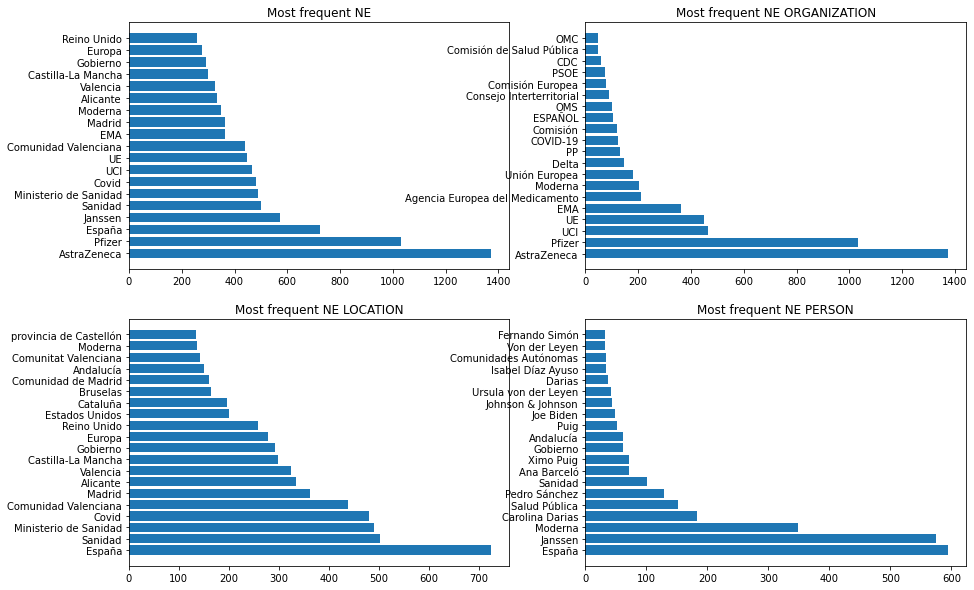

In [6]:
fig, axs = plt.subplots(2, 2,figsize=(15,10))
axs[0, 0].barh(y=df_ner.sort_values('Frequency',ascending=False).head(20)['Entity'],width=df_ner.sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[0,0].set_title('Most frequent NE')
axs[0, 1].barh(y=df_ner[df_ner['Label']=="ORG"].sort_values('Frequency',ascending=False).head(20)['Entity'], width=df_ner[df_ner['Label']=="ORG"].sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[0,1].set_title('Most frequent NE ORGANIZATION')
axs[1, 0].barh(y=df_ner[df_ner['Label']=="LOC"].sort_values('Frequency',ascending=False).head(20)['Entity'], width=df_ner[df_ner['Label']=="LOC"].sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[1,0].set_title('Most frequent NE LOCATION')
axs[1, 1].barh(y=df_ner[df_ner['Label']=="PER"].sort_values('Frequency',ascending=False).head(20)['Entity'], width=df_ner[df_ner['Label']=="PER"].sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[1,1].set_title('Most frequent NE PERSON')